<br>

<div align=center><font color=maroon size=6><b>Learn the Basics</b></font></div>
<br>
<div align=center><font color=maroon size=4><b>(CS231n PyTorch Tutorial)</b></font></div>

<br>

<font size=4><b>References:</b></font>
1. Lecture 8 Pytorch slides: CS231n PyTorch Tutorial<br><font size=2>`D:\KeepStudy\Stanford\CS231n_Convolutional-Neural-Networks-for-Visual-Recognition\0 lecture slides\lecture_8 - 2 Pytorch.pdf`</font>


2. Pytorch official tutorials: [WELCOME TO PYTORCH TUTORIALS](https://pytorch.org/tutorials/index.html)
* [Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)
    * [Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)&ensp;(略)
    * [TENSORS](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) (Tutorials > Tensors)
    * [Datasets and DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) (Tutorials > Datasets & DataLoaders)
    * [Build Model](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) (Tutorials > Build the Neural Network)
    * [Automatic Differentiation](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) (Tutorials > Automatic Differentiation with torch.autograd)
    * [Optimization Loop](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) (Tutorials > Optimizing Model Parameters)
    * [Save, Load and Use Model](https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html) (Tutorials > Save and Load the Model)


* [PyTorch Recipes](https://pytorch.org/tutorials/recipes/recipes_index.html)

<br>
<br>

# <font style="color:blue;font-size:110%;font-weight:bold">TENSORS</font>

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to `NumPy's` ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see `Bridge with NumPy`). 

Tensors are also optimized for automatic differentiation (we’ll see more about that later in the [Autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

<br>

In [1]:
import torch

import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

<br>

## Initializing a Tensor

### Directly from data

In [3]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

<br>

### From a Numpy array

Tensors can be created from NumPy arrays (and vice versa - see [Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)).

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

<br>

### From another tensor

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [5]:
# retains the properties of x_data
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [6]:
# overrides the datatype of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float)
x_rand

tensor([[0.3310, 0.9394],
        [0.7755, 0.8797]])

<br>

### With random or constant values:

shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [7]:
shape = (2,3,)

In [8]:
rand_tensor = torch.rand(shape)
rand_tensor

tensor([[0.4039, 0.0701, 0.4876],
        [0.0564, 0.4843, 0.8168]])

In [9]:
ones_tensor = torch.ones(shape)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [10]:
zeros_tensor = torch.zeros(shape)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

<br>
<br>

## Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [11]:
tensor = torch.rand(3,4)
tensor

tensor([[0.5730, 0.3064, 0.8686, 0.3647],
        [0.5309, 0.1777, 0.3743, 0.7102],
        [0.7722, 0.2021, 0.7823, 0.7325]])

In [12]:
tensor.shape

torch.Size([3, 4])

In [13]:
tensor.size()

torch.Size([3, 4])

In [14]:
tensor.dtype

torch.float32

In [15]:
tensor.device

device(type='cpu')

<br>
<br>

## Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described `here`([torch](https://pytorch.org/docs/stable/torch.html)).

Each of these operations can be run on the GPU (at typically higher speeds than on a CPU). If you’re using **Colab**, allocate a GPU by going to `Runtime > Change runtime type > GPU`.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using **`.to`** method (after checking for GPU availability). <font size=3 color=maroon>Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!</font>

In [16]:
torch.cuda.is_available()

True

In [17]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

<br>

### Standard numpy-like indexing and slicing

In [18]:
tensor = torch.rand(4,4)
tensor

tensor([[0.9880, 0.8574, 0.5132, 0.0198],
        [0.2757, 0.0768, 0.1185, 0.0267],
        [0.5538, 0.9278, 0.1123, 0.1449],
        [0.6735, 0.6554, 0.4960, 0.3828]])

In [19]:
tensor[0]        # first row

tensor([0.9880, 0.8574, 0.5132, 0.0198])

In [20]:
tensor[:, 0]    # first column

tensor([0.9880, 0.2757, 0.5538, 0.6735])

In [21]:
tensor[..., -1] # last column

tensor([0.0198, 0.0267, 0.1449, 0.3828])

In [22]:
tensor[:, 1] = 0
tensor

tensor([[0.9880, 0.0000, 0.5132, 0.0198],
        [0.2757, 0.0000, 0.1185, 0.0267],
        [0.5538, 0.0000, 0.1123, 0.1449],
        [0.6735, 0.0000, 0.4960, 0.3828]])

<br>

### Joining tensors

You can use **`torch.cat`** to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from **`torch.cat`**.

In [23]:
tensor = torch.ones(3,3)
tensor[:,2] = 0
tensor

tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]])

In [24]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0.]])

<br>

### Arithmetic operations

In [25]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = t1 @ t1.T
y2 = t1.matmul(t1.T)

y3 = torch.rand_like(t1)
torch.matmul(t1, t1.T, out=y3)

y1, y2, y3

(tensor([[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.]]),
 tensor([[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.]]),
 tensor([[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.]]))

In [26]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = t1 * t1
z2 = t1.mul(t1)

z3 = torch.rand_like(t1)
torch.mul(t1, t1, out=z3)

z1, z2, z3

(tensor([[1., 1., 0., 1., 1., 0., 1., 1., 0.],
         [1., 1., 0., 1., 1., 0., 1., 1., 0.],
         [1., 1., 0., 1., 1., 0., 1., 1., 0.]]),
 tensor([[1., 1., 0., 1., 1., 0., 1., 1., 0.],
         [1., 1., 0., 1., 1., 0., 1., 1., 0.],
         [1., 1., 0., 1., 1., 0., 1., 1., 0.]]),
 tensor([[1., 1., 0., 1., 1., 0., 1., 1., 0.],
         [1., 1., 0., 1., 1., 0., 1., 1., 0.],
         [1., 1., 0., 1., 1., 0., 1., 1., 0.]]))

<br>

### Single-element tensors

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using **`item()`**:

In [27]:
agg = t1.sum()
agg

tensor(18.)

In [28]:
agg_item = agg.item()
agg_item

18.0

In [29]:
type(agg_item)

float

In [30]:
print(type(agg_item))

<class 'float'>


<br>

### In-place operations

Operations that store the result into the operand are called in-place. They are denoted by a **`_`** suffix. For example: **`x.copy_(y)`**, **`x.t_()`**, will change x.

In [31]:
print(f"{t1} \n")

tensor([[1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0.]]) 



In [32]:
t1.add_(5)
t1

tensor([[6., 6., 5., 6., 6., 5., 6., 6., 5.],
        [6., 6., 5., 6., 6., 5., 6., 6., 5.],
        [6., 6., 5., 6., 6., 5., 6., 6., 5.]])

<font color=red size=3><b>Note:</b></font>

<div class="alert alert-block alert-danger">In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.</div>

<br>

### Bridge with NumPy

see [Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)

<br>
<br>
<br>

# <font style="color:blue;font-size:110%;font-weight:bold">Datasets & DataLoaders</font>

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: 
<font size=3 color=maroon><b>torch.utils.data.DataLoader</b></font> and <font size=3 color=maroon><b>torch.utils.data.Dataset</b></font> that allow you to `use pre-loaded datasets as well as your own data`. 
* **`Dataset`** stores the <font color=maroon>samples</font> and their corresponding <font color=maroon>labels</font>.
* **`DataLoader`** wraps an iterable around the **`Dataset`** to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: [Image Datasets](https://pytorch.org/vision/stable/datasets.html), [Text Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio Datasets](https://pytorch.org/audio/stable/datasets.html).

<br>

## Loading a Dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)  dataset from <font size=3 color=maroon><b>TorchVision</b></font>. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
* **`root`** is the path where the train/test data is stored,
* **`train`** specifies training or test dataset,
* **`download=True`** downloads the data from the internet if it’s not available at root.
* **`transform`** and **`target_transform`** specify the *feature* and *label* transformations.

In [33]:
from torch.utils.data import Dataset
# from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor
# from torchvision.transforms import ToPILImage

import matplotlib.pyplot as plt

In [34]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [35]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

<br>
<br>

## Iterating and Visualizing the Dataset

We can index **`Datasets`** manually like a list: **`training_data[index]`**. We use **`matplotlib`** to visualize some samples in our training data.

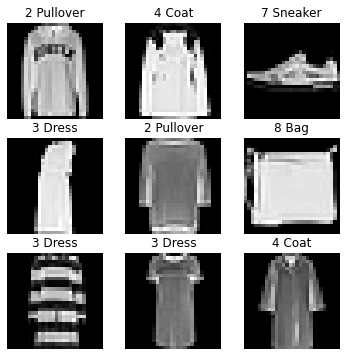

In [36]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(6, 6))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.title(str(label) + " " + labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<br>
<br>

## <font style="color:red;font-size:110%;font-weight:bold">Creating a Custom Dataset for your files</font>

A custom Dataset class must implement three functions: <font size=3 color=maroon><b><u>_</u><u>_</u>init<u>_</u><u>_</u></b></font>, <font size=3 color=maroon><b><u>_</u><u>_</u>len<u>_</u><u>_</u></b></font>, and <font size=3 color=maroon><b><u>_</u><u>_</u>getitem<u>_</u><u>_</u></b></font>. 

Take a look at this implementation; the FashionMNIST images are stored in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.

In the next sections, we’ll break down what’s happening in each of these functions.

In [37]:
import os
import pandas as pd
from torchvision.io import read_image

In [38]:
# %pip install pandas

In [39]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, 
                       img_dir, 
                       transform=None, 
                       target_transform=None):
        
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
        
    def __len__(self):
        return len(self.img_labels)
    
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0] )
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

<br>

### <font size=4 color=maroon><b><u>_</u><u>_</u>init<u>_</u><u>_</u></b></font>

The **`__init__`** function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

The labels.csv file looks like:

```python
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

```

<br>

### <font size=4 color=maroon><b><u>_</u><u>_</u>len<u>_</u><u>_</u></b></font>

The **`__len__`** function returns the number of samples in our dataset.

Example:

```python
def __len__(self):
    return len(self.img_labels)

```

<br>

### <font size=4 color=maroon><b><u>_</u><u>_</u>getitem<u>_</u><u>_</u></b></font>

The **`__getitem__`** function loads and returns a sample from the dataset at the given index `idx`. Based on the index, it identifies the image’s location on disk, converts that to a <font color=maroon><b>tensor</b></font> using `read_image`, retrieves the corresponding label from the csv data in `self.img_labels`, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

```python
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label
```

<br>
<br>

## Preparing your data for training with DataLoaders

The <font size=3 color=maroon><b>Dataset</b></font> retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s <font size=3 color=maroon>multiprocessing</font> to speed up data retrieval.

<font size=3 color=maroon><b>DataLoader</b></font> is an iterable that abstracts this complexity for us in an easy API.

In [40]:
from torch.utils.data import DataLoader
# from torch.utils.data import Dataset

In [53]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

<br>

### Iterate through the DataLoader

We have loaded that dataset into the **`DataLoader`** and can iterate through the dataset as needed. Each iteration below returns a batch of **`train_features`** and **`train_labels`** (containing **`batch_size=64`** features and labels respectively). Because we specified **`shuffle=True`**, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


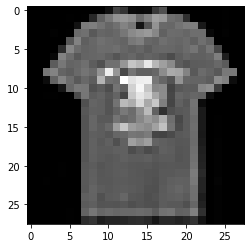

Label: 0


In [42]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

<br>
<br>
<br>

# <font style="color:blue;font-size:110%;font-weight:bold">Build Model</font>

<br>

<font size=5>BUILD THE NEURAL NETWORK</font>

<font size=3>Neural networks comprise of layers/modules that perform operations on data. 


* The [<font color=maroon><b>torch.nn</b></font>](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to build your own neural network. 


* Every module in PyTorch subclasses the [<font color=maroon><b>nn.Module</b></font>](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). 


* A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.
</font>

<font color=blue size=5><b>torch.nn Module</b></font>

In [43]:
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

<br>
<br>

## Get Device for Training

We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let’s check to see if [<font color=maroon size=3><b>torch.cuda</b></font>](https://pytorch.org/docs/stable/notes/cuda.html) is available, else we continue to use the CPU.

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using {device} device")

Using cuda device


<br>
<br>

## Define the Class

We define our neural network by subclassing **`nn.Module`**, and initialize the neural network layers in **`__init__`**. Every **`nn.Module`** subclass implements the operations on input data in the **`forward`** method.

In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
                nn.Linear(28*28, 512),
                nn.ReLU(),
                nn.Linear(512, 512),
                nn.ReLU(),
                nn.Linear(512, 10)
        )
        
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

<br>

We create an instance of **`NeuralNetwork`**, and move it to the device, and print its structure.

In [46]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


<br>

<font size=3>To use the model, we pass it the input data. This executes the model’s forward, along with some [<font size=3 color=maroon><b>background operations</b></font>](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). 
    
<font color=maroon>Do not call <b>model.forward()</b> directly!</font></font>

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits.shape)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

<br>
<br>

## Model Layers

Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [ ]:
input_image = torch.rand(3,28,28)
input_image.size()

### nn.Flatten

We initialize the [<font size=3 color=maroon><b>nn.Flatten</b></font>]() layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
flat_image.size()

<br>

### nn.Linear

The [<font size=3 color=maroon><b>linear layer</b></font>](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) is a module that applies a linear transformation on the input <font color=maroon>using its stored weights and biases</font>.

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)

hidden1.size()

<br>

### nn.ReLU

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use [<font size=3 color=maroon><b>nn.ReLU</b></font>](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [ ]:
print(f"Before ReLu:\n {hidden1}\n\n")

hidden1 = nn.ReLU()(hidden1)

print(f"After ReLu:\n{hidden1}")

<br>

### nn.Sequential

[<font size=3 color=maroon><b>nn.Sequential</b></font>]() is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like `seq_modules`.

In [ ]:
seq_modules = nn.Sequential(
        flatten,
        layer1,
        nn.ReLU(),
        nn.Linear(20,10)
)

input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
logits

<br>

### nn.Softmax

The last linear layer of the neural network returns *`logits`*` - raw values in [-infty, infty]` - which are passed to the [<font size=3 color=maroon><b>nn.Softmax</b></font>]() module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

<br>

### Model Parameters

Many layers inside a neural network are ***parameterized***, i.e. have associated weights and biases that are optimized during training. Subclassing **`nn.Module`** automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s **`parameters()`** or **`named_parameters()`** methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [ ]:
print(f"Model structure: {model}\n\n")


for name,param in model.named_parameters():
    print(f"Layer: {name} \nSize: {param.size()} \nValues : \n{param[:2]} \n\n")

<br>
<br>
<br>

# Automatic Differentiation  <a href="https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html" style="text-decoration:none;"><font size=2>[link]</font></a>

详见:
* 上面蓝色 [link] 的链接，
* 或者见自己笔记：`D:\KeepStudy\0_Coding\Pytorch\Pytorch_Docs\0 Autograd.ipynb`

<br>
<br>
<br>

# <font style="color:blue;font-size:110%;font-weight:bold">Optimization Loop</font>

<br>

<font size=5>OPTIMIZING MODEL PARAMETERS</font>

Now that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. 

<font color=maroon>Training a model is an iterative process; in each <b>iteration</b> (called an <b><i>epoch</i></b>) the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the [previous section](https://pytorch.org/tutorials/beginner/basics/autograd_tutorial.html)), and optimizes these parameters using gradient descent. </font>

For a more detailed walkthrough of this process, check out this video on [backpropagation from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

<br>

<font size=4><b>Prerequisite Code</b></font>

We load the code from the previous sections on [Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) and [Build Model](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

(略)

<br>

<font size=4><b>Hyperparameters</b></font>

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates ([read more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html) about hyperparameter tuning)

We define the following hyperparameters for training:

* **Number of Epochs** - the number times to iterate over the dataset


* **Batch Size** - the number of data samples propagated through the network before the parameters are updated


* **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [47]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

<br>
<br>

## Loss Function

When presented with some training data, our untrained network is likely not to give the correct answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [<font size=3 color=maroon><b>nn.MSELoss</b></font>](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and [<font size=3 color=maroon><b>nn.NLLLoss</b></font>](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification. [<font size=3 color=maroon><b>nn.CrossEntropyLoss</b></font>](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines **`nn.LogSoftmax`** and **`nn.NLLLoss`**.

We pass our model’s output logits to **`nn.CrossEntropyLoss`**, which will normalize the logits and compute the prediction error.

In [48]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

<br>
<br>

## Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use `Stochastic Gradient Descent`). 

All optimization logic is encapsulated in the **`optimizer`** object. Here, we use the SGD optimizer; additionally, there are many [<font size=3 color=maroon>different optimizers</font>](https://pytorch.org/docs/stable/optim.html) available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

In [49]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<br>

<font size=3>
    
Inside the training loop, optimization happens in three steps:
* Call <font color=maroon>optimizer.zero_grad()</font> to reset the gradients of model parameters. <font color=red><i>Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.</i></font>


* Backpropagate the prediction loss with a call to <font color=maroon>loss.backward()</font>. PyTorch deposits the gradients of the loss w.r.t. each parameter.


* Once we have our gradients, we call <font color=maroon>optimizer.step()</font> to adjust the parameters by the gradients collected in the backward pass.
</font>

<br>

<br>
<br>

## Full Implementation

We define **`train_loop`** that loops over our optimization code, and **`test_loop`** that evaluates the model’s performance against our test data.

In [63]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    for batch, (X,y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
            
            
def test_loop(dataloader, model, loos_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, \
            Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model’s improving performance.

In [64]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 1.478181  [    0/60000]
loss: 1.603208  [ 6400/60000]
loss: 1.510848  [12800/60000]
loss: 1.421172  [19200/60000]
loss: 1.419490  [25600/60000]
loss: 1.355895  [32000/60000]
loss: 1.368680  [38400/60000]
loss: 1.408450  [44800/60000]
loss: 1.261227  [51200/60000]
loss: 1.220700  [57600/60000]
Test Error: 
 Accuracy: 62.8%,             Avg loss: 1.279551 

Epoch 2
-------------------------------
loss: 1.246270  [    0/60000]
loss: 1.218567  [ 6400/60000]
loss: 1.164149  [12800/60000]
loss: 1.110192  [19200/60000]
loss: 1.105657  [25600/60000]
loss: 1.222122  [32000/60000]
loss: 1.035296  [38400/60000]
loss: 1.177889  [44800/60000]
loss: 1.202076  [51200/60000]
loss: 0.983081  [57600/60000]
Test Error: 
 Accuracy: 64.3%,             Avg loss: 1.104755 

Epoch 3
-------------------------------
loss: 1.138592  [    0/60000]
loss: 1.010925  [ 6400/60000]
loss: 1.104472  [12800/60000]
loss: 1.059325  [19200/60000]
loss: 1.129629  [25600/60000]
lo

<br>

<font color=red>RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)</font>


我的解决思路，参照[文献](https://blog.csdn.net/qq_28935065/article/details/119007334)，因为前面已经 有`model = NeuralNetwork().to(device)`，故我在train_loop和test_loop这两个函数的相关 Tensor 变量处都增加了 **`.to(device)`**.

<br>
<br>

## Further Reading

* [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
* [torch.optim](https://pytorch.org/docs/stable/optim.html)
* [Warmstart Training a Model](https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html)

<br>
<br>
<br>

#  Save, Load and Use Model

<br>

<font size=5>SAVE AND LOAD THE MODEL</font>

In this section we will look at how to persist model state with saving, loading and running model predictions.

In [65]:
import torchvision.models as models

<br>

## Saving and Loading Model Weights

PyTorch models store the learned parameters in an internal state dictionary, called **`state_dict`**. These can be persisted via the **`torch.save`** method:

In [69]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), "./model_weights/vgg16_weights.pth")

<br>

To load model weights, you need to create an instance of the same model first, and then load the parameters using **`load_state_dict()`** method.

In [70]:
# we do not specify pretrained=True, i.e. do not load default weights
model = models.vgg16()

model.load_state_dict(torch.load("./model_weights/vgg16_weights.pth"))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<font size=3 color=dodgerblue><b>Note:</b></font>
<div class="alert alert-block alert-info">Be sure to call <font color=maroon>model.eval()</font> method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.</div>

<br><br>

## Saving and Loading Models with Shapes

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass **`model`** (and not **`model.state_dict()`**) to the saving function:

We can then load the model like this:

<br>

<font size=3 color=dodgerblue><b>Note:</b></font>
<div class="alert alert-block alert-info">This approach uses Python <font color=maroon>pickle</font> module when serializing the model, thus it relies on the actual class definition to be available when loading the model.</div>

<br>
<br>

<font size=4><b>Related Tutorials</b></font>:
* [Saving and Loading a General Checkpoint in PyTorch](https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html)